In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
# import warnings
# warnings.filterwarnings('ignore')


# Overview the Data Set

In [49]:
# data load
x_1 = np.load('X.npy')
y_1 = np.load('Y.npy')
img_size = 64

plt.subplot(1,2,1)
plt.imshow(x_1[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_1[900].reshape(img_size, img_size))
plt.axis('off')

[[[0.46666667 0.4745098  0.47843137 ... 0.5176471  0.5137255  0.5019608 ]
  [0.49803922 0.4862745  0.4862745  ... 0.5254902  0.5176471  0.50980395]
  [0.54509807 0.49411765 0.49019608 ... 0.5294118  0.5254902  0.5137255 ]
  ...
  [0.5019608  0.5137255  0.5176471  ... 0.5529412  0.54509807 0.53333336]
  [0.49803922 0.5058824  0.5137255  ... 0.54509807 0.53333336 0.52156866]
  [0.49019608 0.49803922 0.5019608  ... 0.5294118  0.52156866 0.50980395]]

 [[0.59607846 0.60784316 0.61960787 ... 0.4627451  0.4509804  0.44313726]
  [0.60784316 0.61960787 0.6313726  ... 0.4745098  0.4627451  0.4509804 ]
  [0.6156863  0.627451   0.6431373  ... 0.4862745  0.4745098  0.4627451 ]
  ...
  [0.50980395 0.5176471  0.5254902  ... 0.40392157 0.39607844 0.3882353 ]
  [0.5019608  0.50980395 0.5176471  ... 0.4        0.39215687 0.38431373]
  [0.49411765 0.5058824  0.50980395 ... 0.3882353  0.38039216 0.37254903]]

 [[0.5882353  0.6039216  0.61960787 ... 0.53333336 0.5137255  0.5019608 ]
  [0.5921569  0.611764

In [51]:
X = np.concatenate((x_1[204:409], x_1[822:1027]), axis=0)
Z = np.zeros(205)
O = np.ones(205)

Y = np.concatenate((Z,O), axis=0).reshape(X.shape[0],1)
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (410, 64, 64)
Y shape: (410, 1)


In [52]:
# train set, test set create
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print(number_of_train, number_of_test)

348 62


In [42]:
# 차원을 변경
X_train_flattern=X_train.reshape(number_of_train, X_train.shape[1]*X_train.shape[2])
X_test_flattern=X_test.reshape(number_of_test, X_test.shape[1]*X_test.shape[2])

#reshape 함수 형식 알아보기

print(X_train_flattern.shape, X_test_flattern.shape)

(348, 4096) (62, 4096)


In [61]:
# 행렬을 전치

x_train = X_train_flattern.T
x_test = X_test_flattern.T
y_train = Y_train.T
y_test = Y_test.T

print(x_train.shape)

(4096, 348)


# logistic regression

In [56]:
def dummy(param):
    dummy_param = param +5
    return dummy_param
result = dummy(3)

def initialize_weight_and_bias(dimension):
    w = np.full((dimension , 1), 0.01)
    b = 0.0
    return w,b

def sigmoid(x):
    y_head= 1/(1+np.e**(-x))
    return y_head

In [58]:
sigmoid(100)

1.0

In [69]:
def forward_propagation(w, b, x_train, y_train):
    x = np.dot(w.T, x_train) +b # dot함수는 내적  다시 알아보기
    y_head = sigmoid(x)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = np.sum(loss)/x_train.shape[1]
    return cost

In [156]:
w,b=initialize_weight_and_bias(4096)
print(w)
print(b)
print(w.shape)
print(type(b))
cost = forward_propagation(w, b, x_train, y_train)
print(cost)

[[0.01]
 [0.01]
 [0.01]
 ...
 [0.01]
 [0.01]
 [0.01]]
0.0
(4096, 1)
<class 'float'>
14.014222401929988


# gradient descent

In [169]:
def initialize_weight_and_bias(dimension):
    w = np.full((dimension , 1), 0.01)
    b = 0.0
    return w,b

def forward_backward_propagation(w,b, x_train, y_train):
    x = np.dot(w.T, x_train) +b # dot함수는 내적  다시 알아보기
    y_head = sigmoid(x)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = np.sum(loss)/x_train.shape[1]
    
    #backward propagation
    derivate_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivate_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivate_weight":derivate_weight, "derivate_bias": derivate_bias}
    return cost, gradients
    

In [175]:
w,b=initialize_weight_and_bias(4096)
print(w)
print(b)
print(w.shape)
print(type(w))
print(type(b))


cost , derivate_dict = forward_backward_propagation(w,b, x_train, y_train)

print(cost, derivate_dict)
# print(derivate_dict['derivate_weight'])
# print(derivate_dict['derivate_weight'].shape)
# print(derivate_dict['derivate_bias'])
# print(derivate_dict['derivate_bias'].shape)

[[0.01]
 [0.01]
 [0.01]
 ...
 [0.01]
 [0.01]
 [0.01]]
0.0
(4096, 1)
<class 'numpy.ndarray'>
<class 'float'>
14.014222401929988 {'derivate_weight': array([[0.26381565],
       [0.2691909 ],
       [0.27409286],
       ...,
       [0.24135678],
       [0.23780708],
       [0.23305161]]), 'derivate_bias': 0.4942528735619787}


In [171]:
w = derivate_dict['derivate_weight']
b = derivate_dict['derivate_bias']
b=float(b)

cost , derivate_dict = forward_backward_propagation(w,b, x_train, y_train)

print(cost, derivate_dict)

nan {'derivate_weight': array([[0.26381565],
       [0.2691909 ],
       [0.27409286],
       ...,
       [0.24135678],
       [0.23780708],
       [0.23305161]]), 'derivate_bias': 0.4942528735632184}


In [179]:
def forward_backward_propagation(w ,b ,x_train, y_train):
    x = np.dot(w.T , x_train)+b
    y_head = sigmoid(x)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = np.sum(loss)/x_train.shape[1]
    print(cost)
    #backward propagation
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    print(derivate_weight)
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight":derivative_weight, "derivative_bias":derivative_bias }
    return cost , gradients

In [180]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [181]:
parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

14.014222401929988


NameError: name 'derivate_weight' is not defined

In [183]:
def forward_backward_propagation(w ,b ,x_train, y_train):
    z = np.dot(w.T , x_train)+b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = np.sum(loss)/x_train.shape[1]
    print(cost)
    #backward propagation
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    print(derivate_weight)
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight":derivative_weight, "derivative_bias":derivative_bias }
    return cost , gradients

In [184]:
# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

In [185]:
predict(parameters["weight"],parameters["bias"],x_test)

NameError: name 'parameters' is not defined

In [187]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

# sklearn이용하여 logistic reg

In [191]:
#sklearn 이용
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state=42, max_iter=150)

print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


# 딥러닝 날코딩 tensorflow 안씀

In [192]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [193]:
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

In [195]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [197]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):
    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [198]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    return parameters

In [199]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

Cost after iteration 0: 0.328968
Cost after iteration 100: 0.336379
Cost after iteration 200: 0.301014
Cost after iteration 300: 0.250538
Cost after iteration 400: 0.203739
Cost after iteration 500: 0.167159
Cost after iteration 600: 0.139918
Cost after iteration 700: 0.119787
Cost after iteration 800: 0.104390
Cost after iteration 900: 0.092154
Cost after iteration 1000: 0.082112
Cost after iteration 1100: 0.073599
Cost after iteration 1200: 0.066122
Cost after iteration 1300: 0.059340
Cost after iteration 1400: 0.053107
Cost after iteration 1500: 0.047461
Cost after iteration 1600: 0.042466
Cost after iteration 1700: 0.038194
Cost after iteration 1800: 0.034651
Cost after iteration 1900: 0.031729
Cost after iteration 2000: 0.029287
Cost after iteration 2100: 0.027214
Cost after iteration 2200: 0.025430
Cost after iteration 2300: 0.023878
Cost after iteration 2400: 0.022513


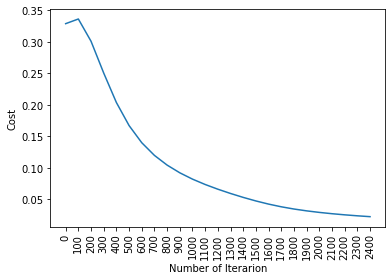

train accuracy: 99.71264367816092 %
test accuracy: 95.16129032258064 %


In [200]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)
    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

In [204]:
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

# Evaluating the DNN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5570
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5284
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5655
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5114
Epoch 5/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5300
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.5475
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.5254
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5238
Epoch 9/100
8/8 [==============================] - 0s 993us/step - loss: 0.6683 - accuracy: 0.5824
Epoch 10/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.5362
Epoch 11/100
8/8 [=========

8/8 [==============================] - 0s 855us/step - loss: 0.1590 - accuracy: 0.9726
Epoch 84/100
8/8 [==============================] - 0s 712us/step - loss: 0.1522 - accuracy: 0.9716
Epoch 85/100
8/8 [==============================] - 0s 997us/step - loss: 0.1603 - accuracy: 0.9703
Epoch 86/100
8/8 [==============================] - 0s 855us/step - loss: 0.1826 - accuracy: 0.9561
Epoch 87/100
8/8 [==============================] - 0s 997us/step - loss: 0.1461 - accuracy: 0.9773
Epoch 88/100
8/8 [==============================] - 0s 855us/step - loss: 0.1530 - accuracy: 0.9697
Epoch 89/100
8/8 [==============================] - 0s 1ms/step - loss: 0.1318 - accuracy: 0.9828
Epoch 90/100
8/8 [==============================] - 0s 997us/step - loss: 0.1399 - accuracy: 0.9850
Epoch 91/100
8/8 [==============================] - 0s 997us/step - loss: 0.1498 - accuracy: 0.9689
Epoch 92/100
8/8 [==============================] - 0s 997us/step - loss: 0.1411 - accuracy: 0.9794
Epoch 93/100
8/

8/8 [==============================] - 0s 855us/step - loss: 0.3161 - accuracy: 0.9618
Epoch 65/100
8/8 [==============================] - 0s 997us/step - loss: 0.2991 - accuracy: 0.9568
Epoch 66/100
8/8 [==============================] - 0s 855us/step - loss: 0.3307 - accuracy: 0.9589
Epoch 67/100
8/8 [==============================] - 0s 855us/step - loss: 0.3056 - accuracy: 0.9555
Epoch 68/100
8/8 [==============================] - 0s 855us/step - loss: 0.2824 - accuracy: 0.9767
Epoch 69/100
8/8 [==============================] - 0s 855us/step - loss: 0.2894 - accuracy: 0.9748
Epoch 70/100
8/8 [==============================] - 0s 855us/step - loss: 0.3061 - accuracy: 0.9723
Epoch 71/100
8/8 [==============================] - 0s 855us/step - loss: 0.2847 - accuracy: 0.9752
Epoch 72/100
8/8 [==============================] - 0s 997us/step - loss: 0.2858 - accuracy: 0.9770
Epoch 73/100
8/8 [==============================] - 0s 712us/step - loss: 0.2758 - accuracy: 0.9771
Epoch 74/100


8/8 [==============================] - 0s 997us/step - loss: 0.3539 - accuracy: 0.9605
Epoch 46/100
8/8 [==============================] - 0s 855us/step - loss: 0.3370 - accuracy: 0.9665
Epoch 47/100
8/8 [==============================] - 0s 931us/step - loss: 0.3422 - accuracy: 0.9666
Epoch 48/100
8/8 [==============================] - 0s 998us/step - loss: 0.3382 - accuracy: 0.9561
Epoch 49/100
8/8 [==============================] - 0s 916us/step - loss: 0.3575 - accuracy: 0.9284
Epoch 50/100
8/8 [==============================] - ETA: 0s - loss: 0.3222 - accuracy: 0.93 - 0s 1ms/step - loss: 0.3196 - accuracy: 0.9707
Epoch 51/100
8/8 [==============================] - 0s 855us/step - loss: 0.3261 - accuracy: 0.9770
Epoch 52/100
8/8 [==============================] - 0s 997us/step - loss: 0.2965 - accuracy: 0.9674
Epoch 53/100
8/8 [==============================] - 0s 855us/step - loss: 0.3242 - accuracy: 0.9827
Epoch 54/100
8/8 [==============================] - 0s 997us/step - loss: